In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(training_images, training_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [11]:
training_images.shape

(60000, 28, 28)

In [12]:
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
model.fit(training_images,training_labels,epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.4409 - accuracy: 0.8404


In [19]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 6s 619us/sample - loss: 0.3821 - accuracy: 0.8600


[0.3821279605388641, 0.86]

In [20]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [22]:
model.layers # tf.keras.model 객체의 layers 

In [24]:
model.layers[0].output # return layer's output

<tf.Tensor 'conv2d_2/Identity:0' shape=(None, 26, 26, 64) dtype=float32>

In [30]:
model.input

<tf.Tensor 'conv2d_2_input:0' shape=(None, 28, 28, 1) dtype=float32>

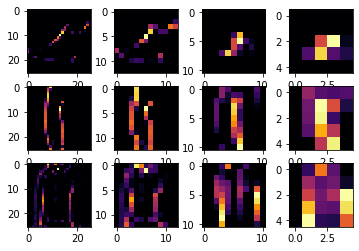

In [39]:
f,ax = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=2
THIRD_IMAGE=6
CONVOLUTION_NUMBER=15

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) 
# 기존 생성한 model을 이용하여 input 과 output을 재지정한 모델 생성
for x in range(4): # output == model's layers output 
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x] # xth layers output
    #f1 shape : (1,26,26,64)
    ax[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno') # imshow 사용을 위한 3차원 변환, CN번째 필터의 output
    ax[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    ax[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    ax[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    ax[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
plt.show()